<a href="https://colab.research.google.com/github/AbuHanifahh/Abu-Analitika-Data/blob/main/UAS_Abu_Hanifah.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Time Series**

A time-series is a series of data points indexed in time order and it is used to predict the future based on the previous observed values. Time series are very frequently plotted via line charts. Time series are used in statistics , weather forecasting, stock price prediction, pattern recognititon, earthquake prediction, e.t.c.

Time series analysis comprises methods for analysing time series data in order to extract meaningful statistics and other characteristics of the data.

Time series forecasting is the use of a model to predict future values based on previously observed values.

# **About Dataset**

### **Ferrari and Tesla. Share prices (2015-2023) (Tesla)**

Tesla, Inc. adalah perusahaan otomotif dan energi bersih multinasional Amerika yang berkantor pusat di Austin, Texas. Tesla merancang dan memproduksi kendaraan listrik (mobil dan truk listrik), penyimpanan energi baterai dari rumah ke skala grid, panel surya dan genteng surya, serta produk dan layanan terkait. Tesla adalah salah satu perusahaan paling berharga di dunia dan, pada tahun 2023, pembuat mobil paling berharga di dunia.  Pada tahun 2021, perusahaan memiliki penjualan kendaraan listrik baterai dan kendaraan listrik plug-in terbesar di seluruh dunia, menangkap 21% pasar baterai-listrik (murni listrik) dan 14% pasar plug-in (yang mencakup hibrida plug-in). Melalui anak perusahaannya Tesla Energy, perusahaan mengembangkan dan merupakan pemasang utama sistem fotovoltaik di Amerika Serikat. Tesla Energy juga merupakan salah satu pemasok global terbesar sistem penyimpanan energi baterai, dengan 6,5 gigawatt-jam (GWh) dipasang pada tahun 2022.

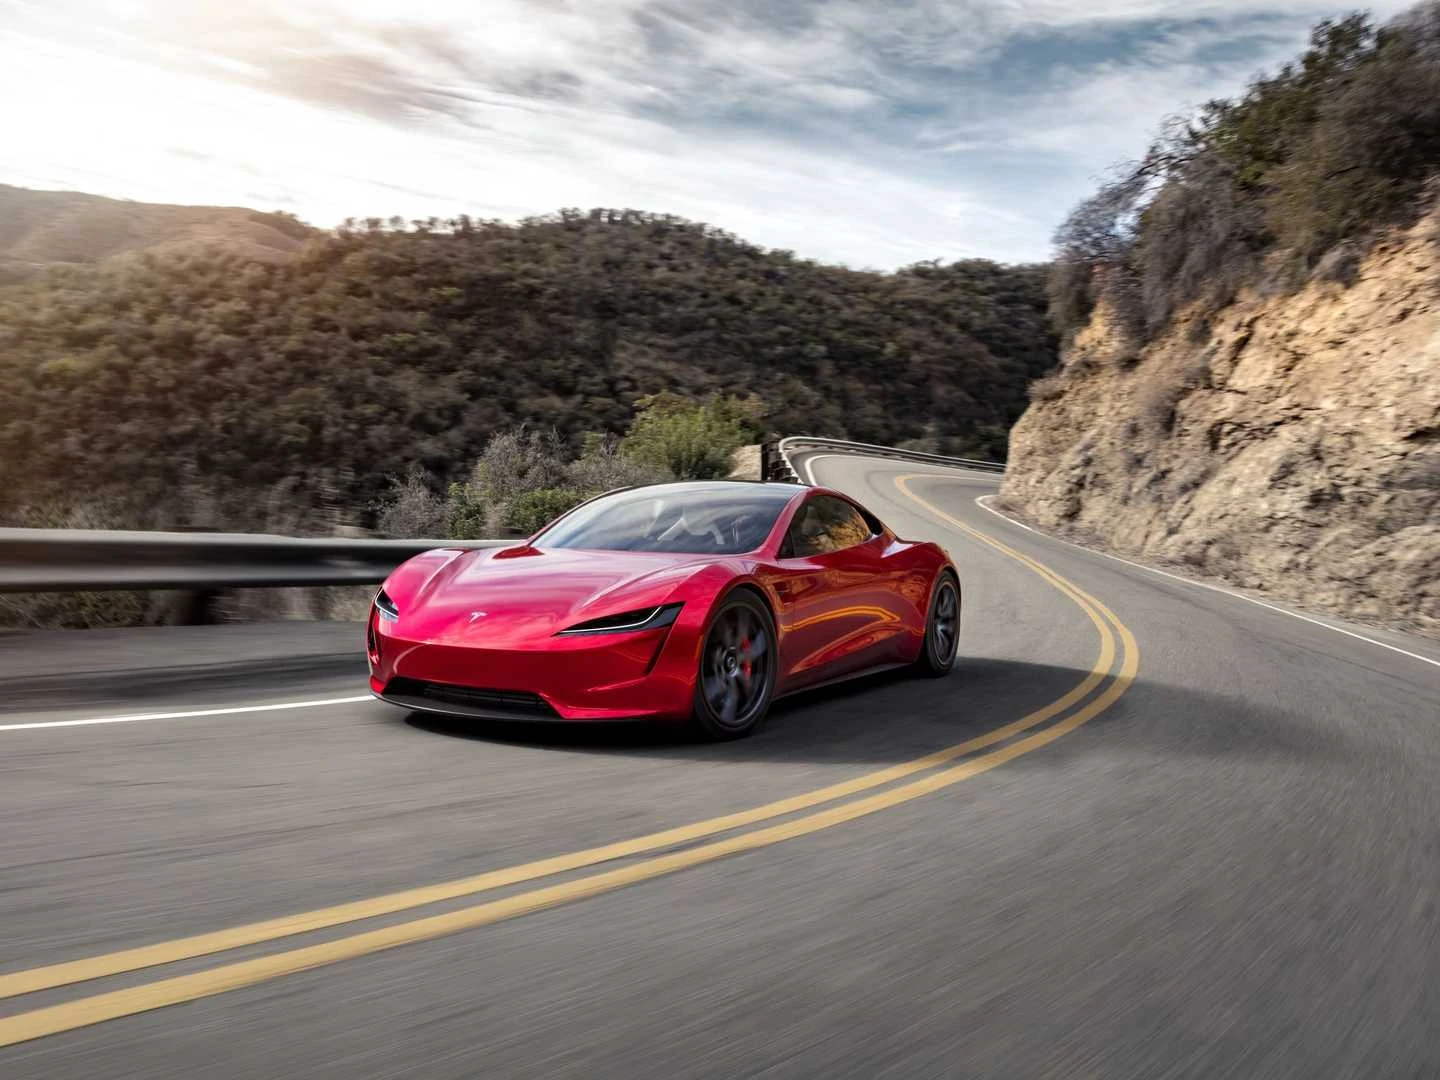


**Source** : https://www.kaggle.com/datasets/kapturovalexander/ferrari-and-tesla-share-prices-2015-2023

**Import Library**

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import datetime
%matplotlib inline

Dalam kode di atas, kita mengimpor beberapa pustaka yang akan digunakan untuk analisis data, visualisasi, dan operasi matematika. Setiap pustaka memiliki fungsinya masing-masing:

- `pandas` digunakan untuk mengolah dan menganalisis data.
- `numpy` digunakan untuk operasi numerik, seperti manipulasi array dan perhitungan matematika.
- `matplotlib.pyplot` digunakan untuk membuat grafik dan visualisasi data.
- `seaborn` digunakan untuk visualisasi data statistik yang lebih menarik.
- `math` digunakan untuk operasi matematika dasar.
- `datetime` digunakan untuk bekerja dengan tanggal dan waktu.

Terakhir, perintah `%matplotlib inline` digunakan untuk mengatur tampilan grafik secara langsung di dalam notebook, sehingga grafik dapat ditampilkan tanpa perlu menggunakan `plt.show()` setiap kali kita membuat plot.

**Import Dataset**

In [43]:
# https://drive.google.com/file/d/1hyU7YlYtXmfHQrZg0ZVLuDbRpXqrESuh/view?usp=sharing
# Mengimport dataset yang sudah di-upload pada google drive

!gdown 1hyU7YlYtXmfHQrZg0ZVLuDbRpXqrESuh

Downloading...
From: https://drive.google.com/uc?id=1hyU7YlYtXmfHQrZg0ZVLuDbRpXqrESuh
To: /content/Tesla.csv
100% 136k/136k [00:00<00:00, 114MB/s]


In [44]:
train_data = pd.read_csv('Tesla.csv')
train_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-10-22,14.104000,14.383333,13.960000,14.114667,14.114667,42378000
1,2015-10-23,14.333333,14.356667,13.846000,13.939333,13.939333,63532500
2,2015-10-26,14.092000,14.392000,14.000000,14.350667,14.350667,50871000
3,2015-10-27,14.322667,14.473333,13.834000,14.023333,14.023333,52791000
4,2015-10-28,14.087333,14.230000,13.886667,14.197333,14.197333,40929000


Di atas terdapat tanggal di mana saham tersebut dijual, harga pembuka dari saham, harga tertinggi dan terendah saham, harga akhir saham, serta jumlah/total saham yang terjual dalam 1 hari.

In [45]:
dataset = pd.read_csv('Tesla.csv')
dataset

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-10-22,14.104000,14.383333,13.960000,14.114667,14.114667,42378000
1,2015-10-23,14.333333,14.356667,13.846000,13.939333,13.939333,63532500
2,2015-10-26,14.092000,14.392000,14.000000,14.350667,14.350667,50871000
3,2015-10-27,14.322667,14.473333,13.834000,14.023333,14.023333,52791000
4,2015-10-28,14.087333,14.230000,13.886667,14.197333,14.197333,40929000
...,...,...,...,...,...,...,...
1880,2023-04-13,182.960007,186.500000,180.940002,185.899994,185.899994,112933000
1881,2023-04-14,183.949997,186.279999,182.009995,185.000000,185.000000,96306500
1882,2023-04-17,186.320007,189.690002,182.690002,187.039993,187.039993,116662200
1883,2023-04-18,187.149994,187.690002,183.580002,184.309998,184.309998,92067000


In [46]:
dataset.shape

(1885, 7)

In [47]:
dataset.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

Check missing values

In [48]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1885 entries, 0 to 1884
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1885 non-null   object 
 1   Open       1885 non-null   float64
 2   High       1885 non-null   float64
 3   Low        1885 non-null   float64
 4   Close      1885 non-null   float64
 5   Adj Close  1885 non-null   float64
 6   Volume     1885 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 103.2+ KB


Dari data di atas sudah dapat dipastikan bahwa tidak ada missing value, ini dapat dibuktikan dari panjang datanya yang sama.

In [49]:
dataset.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

TIDAK ADA MISSING VALUE

Check statistic vales for every features

In [50]:
train_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1.885000e+03
mean,100.049049,102.330085,97.545756,99.989301,99.989301,1.181818e+08
std,110.688467,113.241143,107.806630,110.544977,110.544977,8.181768e+07
min,9.488000,10.331333,9.403333,9.578000,9.578000,1.062000e+07
25%,17.270666,17.557333,16.941334,17.243999,17.243999,6.745200e+07
50%,23.309999,23.650000,22.916000,23.290001,23.290001,9.321150e+07
75%,202.029999,207.696671,197.833328,202.070007,202.070007,1.394250e+08
max,411.470001,414.496674,405.666656,409.970001,409.970001,9.140820e+08


Handle datetime data for time series

In [51]:
train_data['Date'] = pd.to_datetime(train_data['Date'])
train_data.set_index('Date', inplace=True)
train_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-10-22,14.104000,14.383333,13.960000,14.114667,14.114667,42378000
2015-10-23,14.333333,14.356667,13.846000,13.939333,13.939333,63532500
2015-10-26,14.092000,14.392000,14.000000,14.350667,14.350667,50871000
2015-10-27,14.322667,14.473333,13.834000,14.023333,14.023333,52791000
2015-10-28,14.087333,14.230000,13.886667,14.197333,14.197333,40929000


Dari data di atas dapat dilihat bahwa indeksnya berubah, yang semula 1, 2, 3, dst. menjadi tanggal

**EXPLORATORY DATA ANALYSIS**

Now let’s visualise the Adjusted Close (Stock Price when market closed)

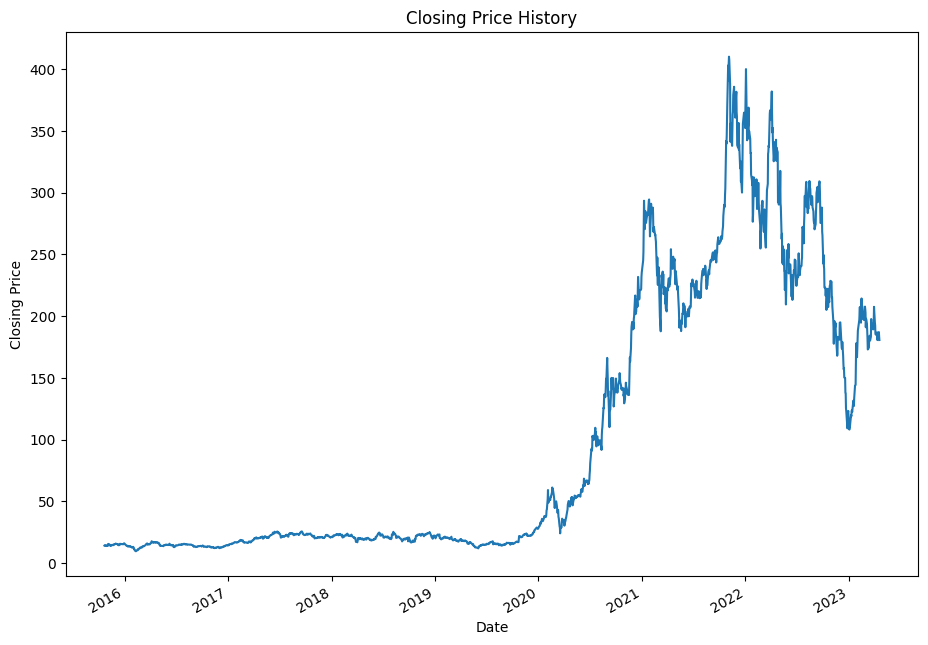

In [52]:
plt.figure(figsize=(11, 8)) # resizing the plot
train_data['Adj Close'].plot()
plt.title('Closing Price History') # adding a title
plt.xlabel('Date') # x label
plt.ylabel('Closing Price') # y label
plt.show()

Data dimulai pada pertengahan tahun 2015-2016 dan terjadi kenaikan pembelian pada awal tahun 2020. Dan terjadi penurunan di akhir-pertengahan tahun 2022. Kecenderungan saham ini adalah naik-turun.

<Figure size 1600x800 with 0 Axes>

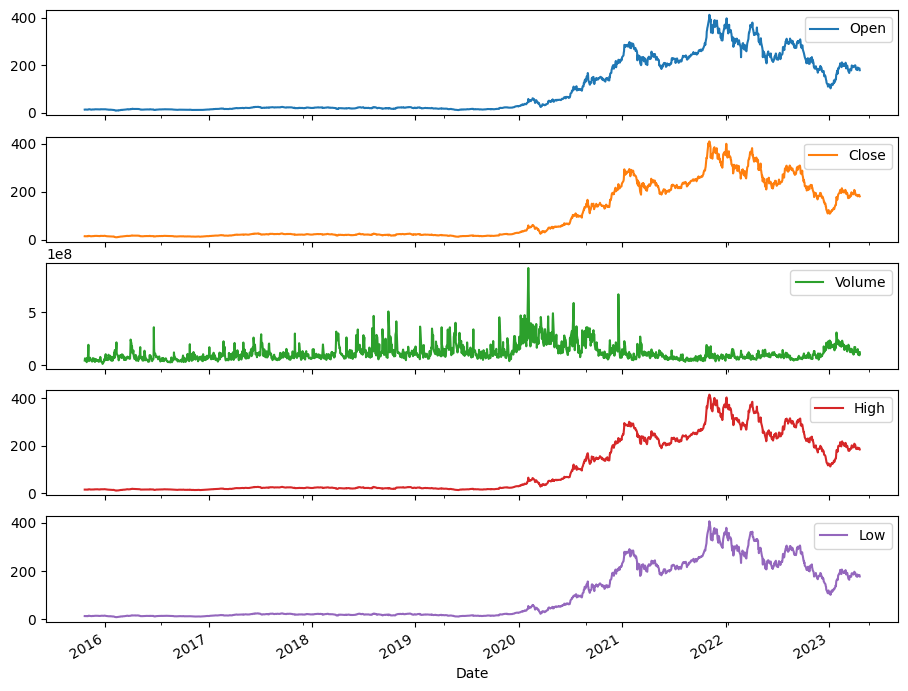

In [53]:
plt.figure(figsize=(16, 8)) # resizing the plot
cols = ['Open', 'Close', 'Volume', 'High', 'Low']
axes = train_data[cols].plot(figsize=(11, 9), subplots = True)
plt.show()

Kecenderungan dari pergerakan tren di atas adalah naik turun. Selain volume pembelian, dari tahun 2015 hingga akhir tahun 2019 pergerakan trennya cenderung flat.

**Membuat percentage**

In [54]:
train_data['HL_PCT'] = (train_data['High'] - train_data['Low']) / train_data['Low'] * 100.0
train_data['PCT_change'] = (train_data['Close'] - train_data['Open']) / train_data['Open'] * 100.0

In [55]:
df = train_data[['HL_PCT', 'PCT_change', 'Adj Close','Volume']]

**Membuat harga penutupan saham sebagai label**

In [56]:
forecast_out = int(math.ceil(0.05 * len(df))) # forcasting out 5% of the entire dataset
print(forecast_out)
df['label'] = df['Adj Close'].shift(-forecast_out)

95


<ipython-input-56-8a15e8de9d0b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label'] = df['Adj Close'].shift(-forecast_out)


In [57]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_log_error

It’s clear from the plot that there is an overall increase in the trend,with some seasonality in it.

**Menggunakan "scaler" untuk normalisasi data**

In [58]:
scaler = StandardScaler()
X = np.array(df.drop(['label'], 1))
scaler.fit(X)
X = scaler.transform(X)

<ipython-input-58-7ce179678b12>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(df.drop(['label'], 1))


Normalisasi data diperlukan agar range data yang berbeda-beda ukurannya tidak terlalu jauh, sehingga mempercepat traiing.

**Menentukan X**

In [59]:
X_Predictions = X[-forecast_out:] # data to be predicted
X = X[:-forecast_out] # data to be trained

**Menentukan Y** dari label yang sebelumnya sudah ada.

In [60]:
df.dropna(inplace=True)
y = np.array(df['label'])

<ipython-input-60-c3da9adb30d1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


# **Splitting dataset**

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Menggunakan Linear Regression

In [62]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_confidence = lr.score(X_test, y_test)

In [63]:
lr_confidence

0.7840101815939468

Menggunakan Random Forest Regressor

In [64]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
rf_confidence = rf.score(X_test, y_test)

In [65]:
rf_confidence

0.9263780180420166

Tingkat kepercayaan "RandomForestRegressor confidence" lebih besar dibandingkan "RandomForestRegressor confidence", sehingga model random forest yang akan digunakan nantinya.

In [66]:
last_date = df.index[-1] #getting the lastdate in the dataset
last_unix = last_date.timestamp() #converting it to time in seconds
one_day = 86400 #one day equals 86400 seconds
next_unix = last_unix + one_day # getting the time in seconds for the next day
forecast_set = rf.predict(X_Predictions) # predicting forecast data
df['Forecast'] = np.nan
for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += 86400
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)]+[i]

<ipython-input-66-3eb2aa88d409>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Forecast'] = np.nan
<ipython-input-66-3eb2aa88d409>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)]+[i]
<ipython-input-66-3eb2aa88d409>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[next_date] = [np.nan for _ in range(len

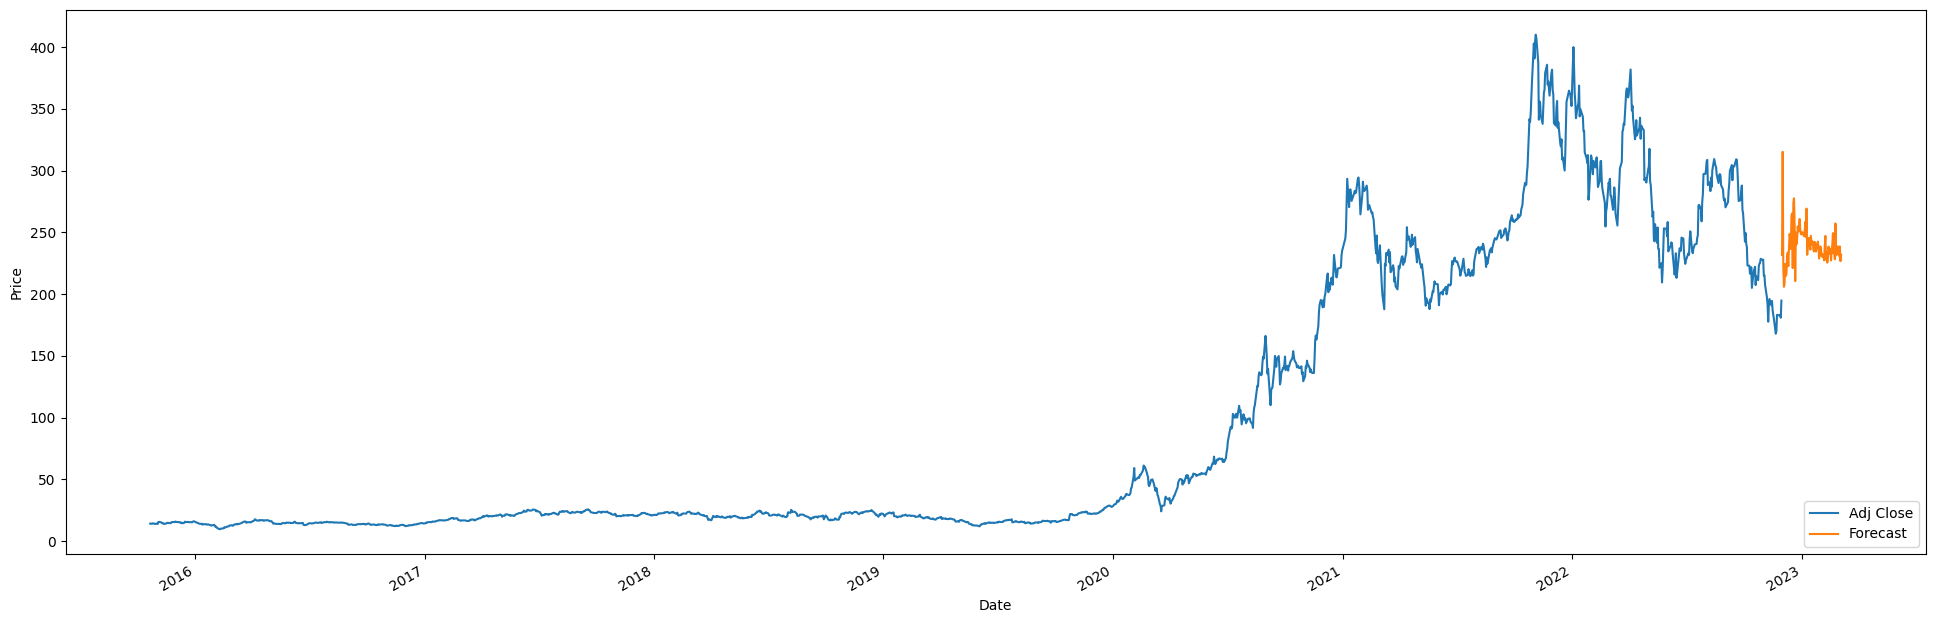

In [77]:
plt.figure(figsize=(24, 8))
df['Adj Close'].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

Setelah membaca data di waktu sebelumnya, didapatkanlah hasil peramalan untuk beberapa bulan kedepan yang ditunjukan oleh bagian yang berwarna oranye. Harga yang ditampilkan oleh bagian warna oranye berkisar antara 200 hingga 300.